In [8]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "Pyber_city_data.csv "
ride_data_to_load = "Pyber_ride_data.csv "

# Read the City and Ride Data
city_data= pd.read_csv(city_data_to_load)
ride_data= pd.read_csv(ride_data_to_load)

#city_data_to_load.describe

city_data.head()




# Combine the data into a single dataset

merged_df= pd.merge(city_data, ride_data, on="city")
merged_df.head(20)
# Display the data table for preview



,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850
5,Richardfort,38,Urban,2018-04-21 03:44:04,9.54,3698147103219
6,Richardfort,38,Urban,2018-02-03 00:14:26,29.04,4982665519010
7,Richardfort,38,Urban,2018-02-08 15:50:12,16.55,2270463070874
8,Richardfort,38,Urban,2018-04-03 15:07:34,40.77,9496210735824
9,Richardfort,38,Urban,2018-02-19 14:09:20,27.11,8690324801449


In [88]:
#group data by city
city_group = merged_df.groupby("city")

#AVGfare
avg_fare = city_group.mean()["fare"]

#total of all rides per city
ttl_rides= city_group.count()["ride_id"]

#number of drivers per city
ttl_drivers =  city_group.mean()["driver_count"]

#count of types of cities
city_type =  city_data.set_index('city')["type"]

#create new DF
grouped_df= pd.DataFrame({"Average Fare per City":avg_fare,
                 "Number of Rides": ttl_rides,
                 "Number of Drivers": ttl_drivers,
                 "City Type": city_type })


#grouped_df.head()

In [89]:
#rural data
rural_data= grouped_df[grouped_df['City Type'] =="Rural"]
#rural_data.head() 

#urban data
urban_data= grouped_df[grouped_df['City Type'] =="Urban"]


#suburban data
suburban_data= grouped_df[grouped_df['City Type'] =="Suburban"]
#suburban_data.head() 

## Bubble Plot of Ride Sharing Data

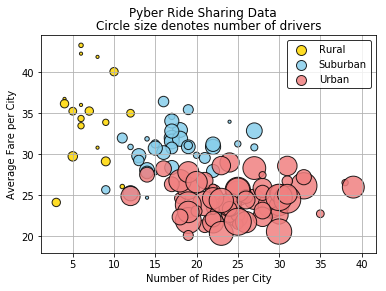

In [90]:
plt.scatter(rural_data['Number of Rides'], rural_data['Average Fare per City'], s = rural_data['Number of Drivers']*10, facecolor = 'gold', edgecolor = 'black', label = 'Rural', alpha = .85)

plt.scatter(suburban_data['Number of Rides'], suburban_data['Average Fare per City'], s = suburban_data['Number of Drivers']*10, facecolor = 'skyblue' , edgecolor = 'black', label = 'Suburban', alpha = .85)

plt.scatter(urban_data['Number of Rides'], urban_data['Average Fare per City'], s = urban_data['Number of Drivers']*10, facecolor = 'lightcoral', edgecolor = 'black', label = 'Urban', alpha = .85)

plt.grid(True)

#plt.subtitle('Note : Size of Bubble Corresponds to Number of Drivers per City')
plt.title("Circle size denotes number of drivers")
plt.suptitle("Pyber Ride Sharing Data")

plt.xlabel('Number of Rides per City')
plt.ylabel('Average Fare per City')

#plt.legend(loc=”Urban”)
lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [100]
lgnd.legendHandles[1]._sizes = [100]
lgnd.legendHandles[2]._sizes = [100]




## Total Fares by City Type

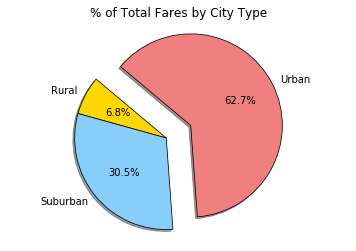

In [79]:
# Calculate Type Percents


group_type= merged_df.groupby('type')
perc_ttl_fares = group_type.sum()['fare']
# Build Pie Chart
colors = [ 'gold','lightskyblue' ,'lightcoral' ]

plt.pie(perc_ttl_fares ,colors=colors,  startangle = 140 , explode=explode, labels=labels,autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .75, 'edgecolor': 'black'} )

labels = perc_ttl_fares.index
explode = [0 , 0, .1]
plt.axis("tight")
plt.title('% of Total Fares by City Type')
plt.axis('equal')
plt.show()
# Save Figure


## Total Rides by City Type

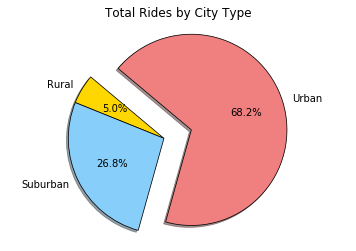

In [85]:
# Calculate Ride Percents
# Calculate Type Percents


group_type= merged_df.groupby('type')
ttl_rides = group_type.sum()['ride_id']
# Build Pie Chart
colors = [ 'gold','lightskyblue' ,'lightcoral' ]

plt.pie(ttl_rides ,colors=colors,  startangle = 140 , explode=explode, labels=labels,autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .75, 'edgecolor': 'black'} )

labels = perc_ttl_fares.index
explode = [0 , 0, .1]
plt.axis("tight")
plt.title('Total Rides by City Type')
plt.axis('equal')
plt.show()
# Build Pie Chart

# Save Figure


## Total Drivers by City Type

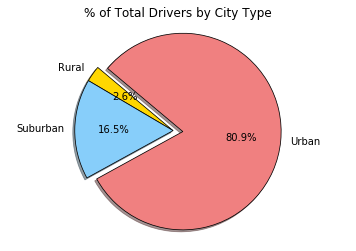

In [86]:
driver_ttl = city_data.groupby('type').sum()['driver_count']

labels = driver_ttl.index

plt.pie(driver_ttl, startangle = 140, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .75, 'edgecolor': 'black'})
plt.title('% of Total Drivers by City Type')
explode = [0 , 0, .3]
plt.axis("tight")
plt.axis('equal')
plt.show()